In this project we will perform stock price prediction. 

In [1]:
#Importing the needed libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas_datareader as web
import math
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM
from keras.models import Sequential
plt.style.use('fivethirtyeight')

In [4]:
#Get the stocks
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#Get the first few entries
df.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.650659
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674
2012-01-10,15.214286,15.053571,15.211071,15.115714,258196400.0,13.020121
2012-01-11,15.101786,14.975357,15.095714,15.091071,215084800.0,12.998899
2012-01-12,15.103571,14.955357,15.081429,15.049643,212587200.0,12.963211
2012-01-13,15.016071,14.952143,14.989286,14.993214,226021600.0,12.914607


In [5]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.650659
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,67.012764
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,67.183548
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,68.096771


There must have been no recording of the stocks on Jan 1, 2012 or Jan 2, 2012 thus the data set starts from 3rd Jan, 2012.

In [6]:
#Shape of the data set
df.shape

(2003, 6)

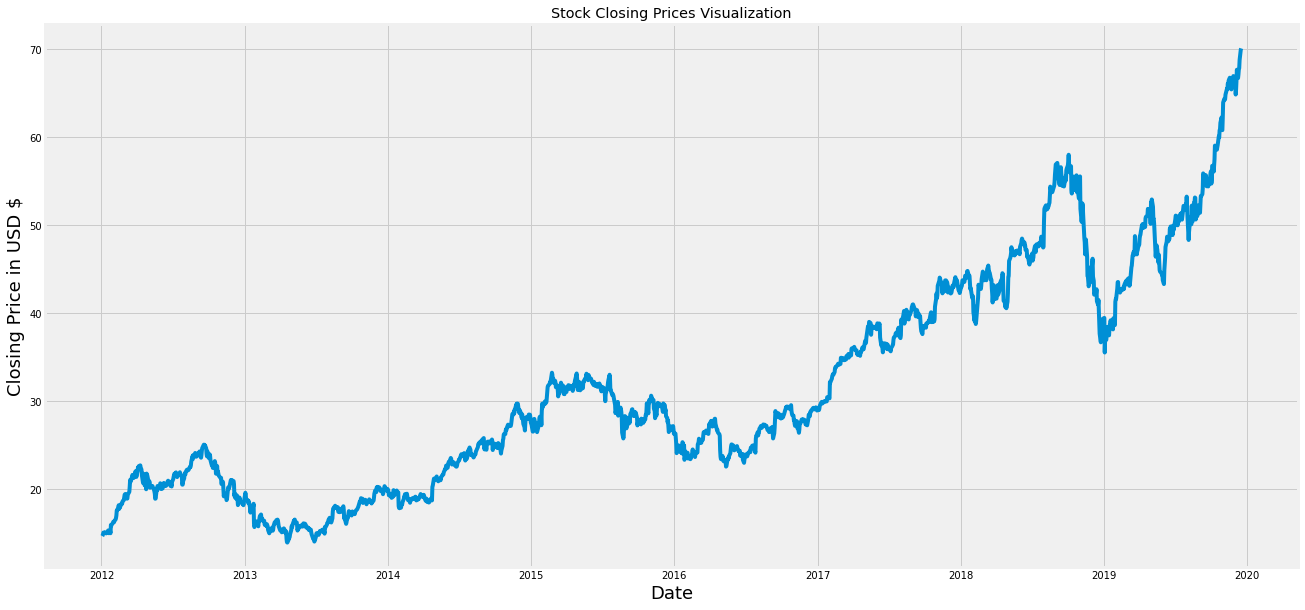

In [7]:
#Visualise the closing prices history
plt.figure(figsize=(20,10))
plt.title('Stock Closing Prices Visualization')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price in USD $', fontsize=18)
plt.show()

From the above visualization it is pretty evident that this has been a really good stock. From the visuals it seems evident that the stock went from under 20 USD to 70 USD on 17th December 2019.

In [8]:
#New Data Frame of Close column only
data = df.filter(['Close'])
#Convert into numpy array
dataset = data.values
#Get the number of rows to train the model on
train_data_len = math.ceil((len(dataset))* .8)

train_data_len

1603

Lets start scaling the data


In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [10]:
#Create Training set
train_data = scaled_data[0:train_data_len, :]
#Split into X_train and y_train
X_train = []
y_train = []

for i in range(60, len(train_data)):
  X_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=60:
    print(X_train)
    print(y_train)
    print()

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]



In [11]:
#Convert X_train and y_train to numpy array
X_train, y_train = np.array(X_train) , np.array(y_train)

In [12]:
#Reshaping the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape


(1543, 60, 1)

Now lets build the LSTM models

In [13]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [14]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
#Train the model
model.fit(X_train, y_train, batch_size=1, epochs=1)


1543/1543 [==============================] - 37s 22ms/step - loss: 0.0014


In [16]:
#Create testing dataset, create array having scaled values from index psn. 1543 to 2003
test_data = scaled_data[train_data_len - 60:, :]
X_test = []
y_test = dataset[train_data_len: , :]
for i in range(60, len(test_data)):
  X_test.append(test_data[i-60:i, 0])


In [17]:
#Convert data to numpy array
X_test = np.array(X_test)

In [18]:
#Our Data is 2-dimensional while the LSTM model expects a 3 Dimensional data set
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [19]:
#Get the predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
#We want predictions to contain same values as Y_test dataset


In [22]:
#Root Mean Squared Error - Its a great way to measure accuracy, measuring difference between predicted values and the actual / observed values
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.13371626853942872

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


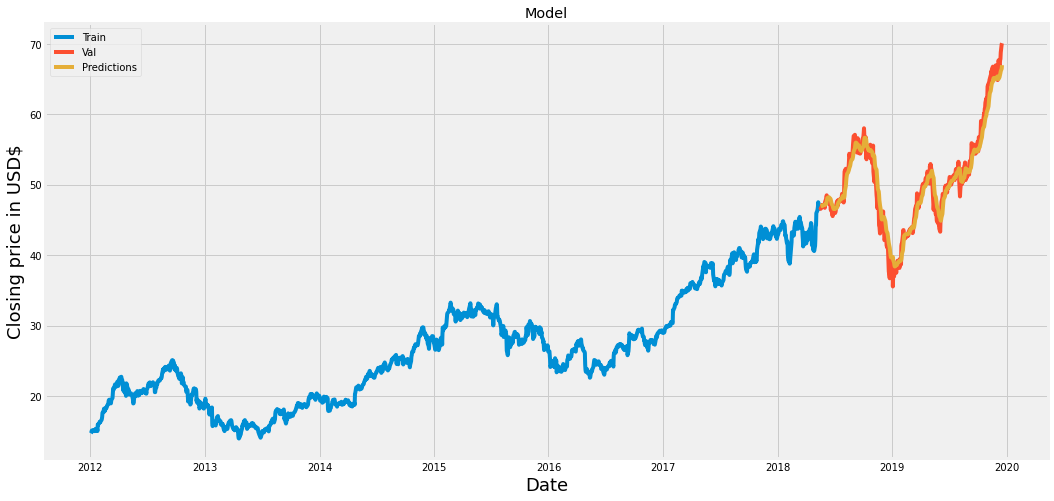

In [28]:
#Plotting the data
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions']=predictions
#Visualization
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing price in USD$', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'])
plt.show()

Our model is doing pretty good as it seems. 

In [29]:
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,47.013821
2018-05-18,46.577499,47.026764
2018-05-21,46.907501,46.988480
2018-05-22,46.790001,46.982620
2018-05-23,47.090000,46.976662
...,...,...
2019-12-11,67.692497,65.646561
2019-12-12,67.864998,65.887558
2019-12-13,68.787498,66.135162


In [32]:
apple_quote = web.DataReader('AAPL',data_source='yahoo',start='2012-01-01', end='2019-12-17')
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
x_test = []
x_test.append(last_60_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
preds = model.predict(x_test)
preds = scaler.inverse_transform(preds)
print(preds)

[[67.4813]]


In [34]:
apple_quote2 = web.DataReader('AAPL',data_source='yahoo',start='2012-01-01', end='2019-12-18')
print(apple_quote2['Close'])

Date
2012-01-03    14.686786
2012-01-04    14.765714
2012-01-05    14.929643
2012-01-06    15.085714
2012-01-09    15.061786
                ...    
2019-12-12    67.864998
2019-12-13    68.787498
2019-12-16    69.964996
2019-12-17    70.102501
2019-12-18    69.934998
Name: Close, Length: 2004, dtype: float64


The price for that day on 2019/12/18 was 69.93 and our model's prediction was 67.48 USD